# NumPy
В этом ноутбуке рассмотрены различные приемы обработки и преобразования изображений с использованием библиотеки NumPy. Изображение представляется в виде тензора, поэтому с ним можно работать так же, как с многомерным массивом: применять математические операции, фильтры, трансформации и анализировать его структуру напрямую.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from skimage import color, io, exposure

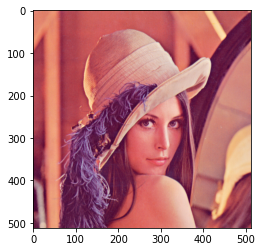

In [2]:
# Загружаем изображение (здесь пример как выгрузить Ленну по ссылке)
url = "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
img = io.imread(url) # Читаем в формате NumPy (H, W, C)
plt.imshow(img)
plt.show()

### Инверсия цветов (негатив)

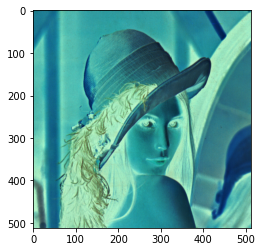

In [3]:
inverted = 255 - img
plt.imshow(inverted)
plt.show()

### Перевод в оттенки серого

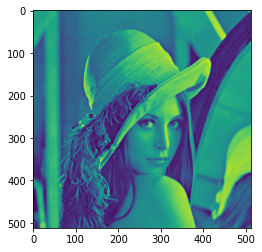

In [4]:
grayscale = color.rgb2gray(img) 
plt.imshow(grayscale)
plt.show()

### Выделение одного цветового канала (например, красного)

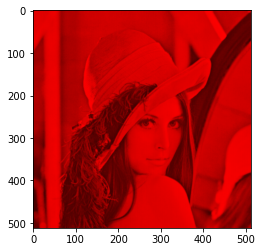

In [5]:
red_channel = img.copy()
red_channel[:, :, 1:] = 0  # Убираем зеленый и синий каналы
plt.imshow(red_channel)
plt.show()

### Отражение изображения по горизонтали

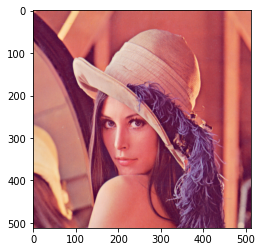

In [6]:
flipped = img[:, ::-1]
plt.imshow(flipped)
plt.show()

### Поворот на 90 градусов по часовой

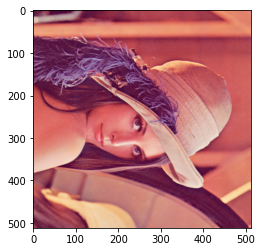

In [7]:
rotated = np.rot90(img, k=-1, axes=(0, 1))
plt.imshow(rotated)
plt.show()

### Простое размытие (бокс-фильтр 3×3)

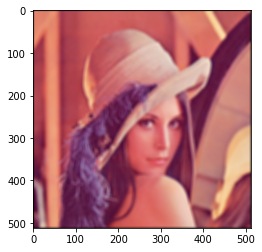

In [8]:
kernel = np.ones((3, 3)) / 9  # Бокс-фильтр 3×3 (усреднение)

blurred = np.apply_along_axis(
    lambda m: np.convolve(m, kernel.flatten(), mode="same"),
    axis=0, arr=img
)
blurred = np.apply_along_axis(
    lambda m: np.convolve(m, kernel.flatten(), mode="same"),
    axis=1, arr=blurred
)

# Ограничиваем значения от 0 до 255 и приводим к uint8
blurred = np.clip(blurred, 0, 255).astype(np.uint8)

plt.imshow(blurred)
plt.show()

### Выделение границ (оператор Собеля)

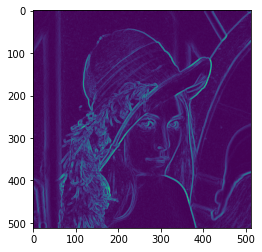

In [9]:
sobel_x = np.array([[-1, 0, 1], 
                     [-2, 0, 2], 
                     [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1], 
                     [0, 0, 0], 
                     [1, 2, 1]])

grad_x = convolve2d(grayscale, sobel_x, mode="same", boundary="symm")
grad_y = convolve2d(grayscale, sobel_y, mode="same", boundary="symm")
edges = np.hypot(grad_x, grad_y)  # Градиентная величина
edges = (edges / edges.max() * 255).astype(np.uint8)  # Нормализация

plt.imshow(edges)
plt.show()

### Добавление шума (Гауссовский шум)

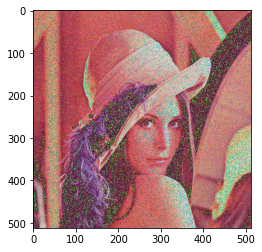

In [10]:
noise = np.random.normal(0, 25, img.shape).astype(np.uint8)
noisy_img = np.clip(img + noise, 0, 255).astype(np.uint8)
plt.imshow(noisy_img)
plt.show()

### Эквализация гистограммы (контрастное улучшение)

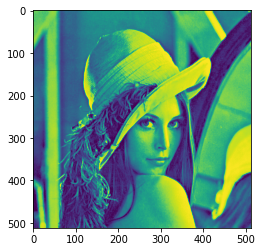

In [11]:
eq_img = exposure.equalize_hist(grayscale) * 255
eq_img = eq_img.astype(np.uint8)

plt.imshow(eq_img)
plt.show()